In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Multiplying Probability Distributions

In [2]:
from scipy import stats

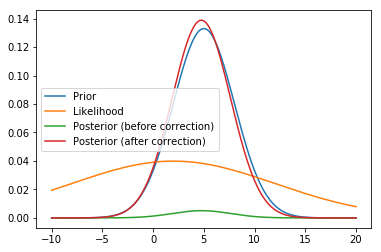

In [6]:
x = linspace(-10, 20, 300)
prior = stats.norm(5, 3).pdf(x)
likelihood = stats.norm(2, 10).pdf(x)
posterior = prior * likelihood
plot(x, prior, label='Prior');
plot(x, likelihood, label='Likelihood');
plot(x, posterior, label='Posterior (before correction)');
plot(x, posterior / sum(posterior) / diff(x)[0], label='Posterior (after correction)');
legend();

## Generating Data to Fit: A Simple Linear Model

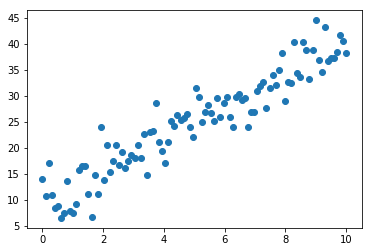

In [7]:
a, b = 3, 10

x = linspace(0, 10, 100)
noise = random.normal(size=x.shape) * 3
y_obs = (a*x + b + noise)

scatter(x, y_obs);

## Fit the Model

In [8]:
import pymc3 as pm

/home/nickdg/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [noise]
>Metropolis: [b]
>Metropolis: [a]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:14<00:00, 3106.42draws/s]
The number of effective samples is smaller than 10% for some parameters.


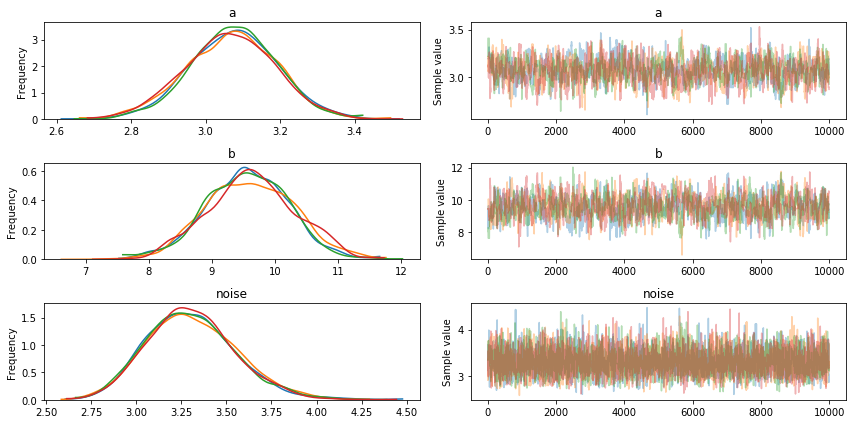

In [15]:
with pm.Model():
    a = pm.Uniform('a', -10, 10)
    b = pm.Uniform('b', -30, 30)    
    noise = pm.HalfNormal('noise', sd=10)
    Yo = pm.Normal('Yo', mu=a*x + b, sd=noise, observed=y_obs)
    
    
    trace = pm.sample(10000, step=pm.Metropolis(), tune=1000, chains=4)  # draw 500 posterior samples

pm.traceplot(trace);

In [12]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,3.076757,0.113733,0.000850,2.860284,3.305425,17664.598175,0.999974
b,9.567431,0.660356,0.004970,8.256856,10.855334,17914.391626,0.999995
noise,3.306796,0.238591,0.001459,2.853088,3.775671,24818.285695,0.999982


## Predict from the Model

100%|██████████| 4000/4000 [00:03<00:00, 1268.37it/s]


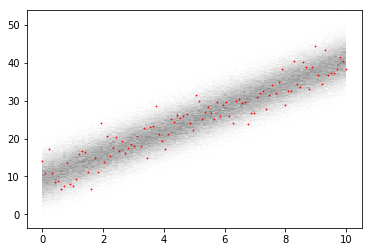

In [13]:
samples = 4000
ppc = pm.sample_ppc(trace, samples=samples, model=model)

xx = x[None, :].repeat(samples, axis=0).flatten()
yy = ppc['Yo'].flatten()

H, xax, yax = histogram2d(xx, yy, bins=(100, 400))
imshow(H.T, extent=[xax[0], xax[-1], yax[0], yax[-1]], origin='low', aspect='auto', cmap='gray_r', vmax=200)
plt.scatter(x, y_obs, s=.6, c='r')